# Exploratory data analysis

We have 5 datasets: 

1. cyberpol
2. dataset_5_1
3. autotrain_TG_sentiment
4. emotions_sentiment_youscan
5. kyiv_digital_sentiment_annotation
6. TRWU - Telegram news about the Russian war in Ukraine


This file contains EDA of all of them in the specified order. 

EDA steps: 
1. Understand the structure (columns or folders structure, classes distribution)
2. Manual inspection of examples
3. Texts length distribution
4. Language detection
5. Word clouds with stop-words filtering
6. Text similarity analysis (check for dupllicates or nearly duplicates) -- *TBD*

In [1]:
import pandas as pd
import numpy as np
import os
import datetime


from utilities.useful_functions import extract_website_name, create_boxplot, create_wordcloud, detect_language_safe, count_emojis, count_special_characters

In [2]:
ru_stopwords = pd.read_csv('ru_stopwords.csv')

In [63]:
ua_stopwords = pd.read_csv('ua_stopwords.csv')

### Cyberpol dataset overview

In [22]:
cyberpol = pd.read_csv('./data_provided/cyberpol/cyberpol-train.csv')

In [23]:
cyberpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source_id        3260 non-null   int64 
 1   source_url       3260 non-null   object
 2   source_category  3260 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.5+ KB


In [24]:
cyberpol

source_id                       source_url         source_category
0        133653      https://twitter.com/IFR2022  AGGRESSIVE_INFORMATION
1         39644         https://t.me/warfakeskrm  RESTRAINED_INFORMATION
2        245395     https://t.me/od_patrolpolice            SAFE_CONTENT
3        252210          https://t.me/trech_kich                    SPAM
4        226108          https://t.me/sitreports  RESTRAINED_INFORMATION
...         ...                              ...                     ...
3255      39593         https://t.me/subbotin_ru  RESTRAINED_INFORMATION
3256     238603             https://t.me/CinCAFU            SAFE_CONTENT
3257  144255926  https://twitter.com/Opoveshenie  AGGRESSIVE_INFORMATION
3258     240164         https://t.me/wyattreed13  RESTRAINED_INFORMATION
3259     249125      https://t.me/embrusiamexico  RESTRAINED_INFORMATION

[3260 rows x 3 columns]

In [25]:
cyberpol['source_category'].value_counts()

source_category
AGGRESSIVE_INFORMATION                  1499
RESTRAINED_INFORMATION                  1174
AGGRESSIVE_MILITARY                      108
RESTRAINED_MILITARY                      107
SAFE_CONTENT                              91
ENTITIES_PROMOTING_VIOLENCE_AND_HATE      83
UNRECOGNIZED_REPUBLICS                    66
SPAM                                      54
VIOLENCE                                  31
COORDINATION_OF_ATTACKS                   23
PERSONAL_INFORMATION                      17
CYBER_ATTACK_COORDINATION                  7
Name: count, dtype: int64

In [26]:
cyberpol['website'] = cyberpol['source_url'].apply(extract_website_name)

In [27]:
cyberpol['website'].value_counts()

website
t           1843
twitter     1320
facebook      97
Name: count, dtype: int64

The dataset contains information about 3260 Telegram, Twitter and Facebook channels and their categories specified. Most of channels publishes aggresive or restrained information. 

Possible use cases: 
1. Channel type classifier training
2. As a list of sources for parsing respective content  

### dataset_5_1 overview

The dataset divided into TEST and TRAIN parts. The data is in the respective folders and additionally divided into 2 folders with classes: positive and negative.

##### Initial structuring into a pandas dataframe

In [35]:
#Define the folder path for dataset
data_path = 'data_provided\\dataset_5_1'

In [36]:
data = []

In [39]:
# Loop through the folder structure
for data_folder in ['test', 'train']:
    print(data_folder)

    folder_path = os.path.join(data_path, data_folder)
    
    for sentiment_class, sentiment_label in [('pos', 'positive'), ('neg', 'negative')]:
        print('Reading:', sentiment_label, 'at time:', datetime.datetime.now())
        
        sentiment_path = os.path.join(folder_path, sentiment_class)
        for text_file_name in os.listdir(sentiment_path):
            if text_file_name.endswith('.txt'):
                text_file_path = os.path.join(sentiment_path, text_file_name)
                with open(text_file_path, 'r', encoding='utf-8') as file:
                    text_file_content = file.read()
                data.append({
                    'data_folder': data_folder,
                    'text_file_name': text_file_name,
                    'text_file_content': text_file_content,
                    'sentiment_class': sentiment_label
                })

test
Reading: positive at time: 2025-01-04 22:45:51.370165
Reading: negative at time: 2025-01-04 22:45:51.534925
train
Reading: positive at time: 2025-01-04 22:45:55.045952
Reading: negative at time: 2025-01-04 22:46:29.086793


In [40]:
df = pd.DataFrame(data, columns=['data_folder', 'text_file_name', 'text_file_content', 'sentiment_class'])

In [45]:
# df.to_parquet('./data_provided/dataset_5_1/dataset_5_1.parquet')
#let's save the structured version of the dataset to make it be usable faster in the future 

##### Analysis steps

**Understand the structure**

In [4]:
df = pd.read_parquet('data_provided/dataset_5_1/dataset_5_1.parquet')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data_folder        13114 non-null  object
 1   text_file_name     13114 non-null  object
 2   text_file_content  13114 non-null  object
 3   sentiment_class    13114 non-null  object
dtypes: object(4)
memory usage: 409.9+ KB


In [6]:
df.isna().sum()

data_folder          0
text_file_name       0
text_file_content    0
sentiment_class      0
dtype: int64

In [7]:
df

data_folder           text_file_name  \
0            test               z_1076.txt   
1            test               z_1085.txt   
2            test               z_1097.txt   
3            test               z_1100.txt   
4            test               z_1112.txt   
...           ...                      ...   
13109       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5704.txt   
13110       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5705.txt   
13111       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5706.txt   
13112       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5707.txt   
13113       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5709.txt   

                                       text_file_content sentiment_class  
0        посол украины в австралии призвал выгнать от...        positive  
1        россия и украина стали чаще обмениваться вое...        positive  
2        на главного редактора журнала  театр  марину...        positive  
3        россия утверждает  что на территории запорож...        positive  
4        полиция крыма опровергла  что российского во...        positive  
...                                                  ...             ...  
13109        набирает обороты скандал  якобы личный т...        negative  
13110          русский против копателя ч рного моря  ...        negative  
13111    военкор     kp ru     дмитрий стешин побывал...        negative  
13112        важно  лживый фейковый канал  операция z...        negative  
13113       момент прил та по жилому дому в днепре  з...        negative  

[13114 rows x 4 columns]

In [8]:
df['data_folder'].value_counts()

data_folder
train    9127
test     3987
Name: count, dtype: int64

In [9]:
df['sentiment_class'].value_counts()

sentiment_class
negative    6848
positive    6266
Name: count, dtype: int64

**Manual inspection of examples**

In [10]:
df.loc[(df['sentiment_class'] == 'positive')]

data_folder           text_file_name  \
0           test               z_1076.txt   
1           test               z_1085.txt   
2           test               z_1097.txt   
3           test               z_1100.txt   
4           test               z_1112.txt   
...          ...                      ...   
8230       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5188.txt   
8231       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5189.txt   
8232       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5190.txt   
8233       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5191.txt   
8234       train  ╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5193.txt   

                                      text_file_content sentiment_class  
0       посол украины в австралии призвал выгнать от...        positive  
1       россия и украина стали чаще обмениваться вое...        positive  
2       на главного редактора журнала  театр  марину...        positive  
3       россия утверждает  что на территории запорож...        positive  
4       полиция крыма опровергла  что российского во...        positive  
...                                                 ...             ...  
8230  жена неонациста  капитана вс рф мангушева заяв...        positive  
8231   московский комсомолец  и lenta сообщают  что ...        positive  
8232   военкора  rt валентина горшенина задержали в ...        positive  
8233  после публикации новости об ударе по штабу чвк...        positive  
8234   мы пробирались через турцию партизанскими тро...        positive  

[6266 rows x 4 columns]

In [11]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][8230]

'жена неонациста  капитана вс рф мангушева заявила  что над ним устроили расправу в тылу  сообщается  что ему выстрелили в голову в упор    мангушев известен как создатель чвк  енот   сам связан с пригожиным  в августе провел стендап с  черепом азовца  и заявил  что все украинцы должны быть уничтожены    '

In [12]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][8232]

' военкора  rt валентина горшенина задержали в москве за конфликт с людьми  которых он сам причисляет к чеченцам  горшенин транслировал происходящее в своем telegram канале  позже он удалил все сообщения  однако журналист илья шепелин и telegram канал baza успели их сохранить      тверская  простили пьяные чеченцы  пытались доказать  что я не имею права быть здесь  говорили  что я не на своей земле  пьяные  угражали убйством  ментам сказал  что 6 командировок в зону сво   пох й       писал горшенин  по его словам  он попытался повлиять на  чеченцев  упоминанием имени рамзана кадырова  но это не сработало  из всех участников конфликта был задержан только он    '

In [13]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][2364]

'  украина подает заявку на вступление в нато в ускоренном порядке    об этом заявил президент украины владимир зеленский после сегодняшнего заседания снбо     де факто мы уже прошли свой путь в нато  де факто мы уже доказали совместимость со стандартами североатлантического союза  они реальны для украины   реальны на поле боя и во всех аспектах нашего взаимодействия  мы доверяем друг другу  помогаем друг другу  и мы защищаем друг друга  это и есть альянс     сказал зеленский   сегодня украина подпишет заявку на вступление в альянс в ускоренном порядке '

In [14]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][123]

'в ставрополе застрелен майор мвд и участник спецоперации 2015 года  вызвавшей недовольство рамзана кадырова  тогда в грозном ставропольские силовики убили чеченца  после этого кадыров разрешил чеченским силовикам открывать огонь на поражение по своим коллегам из других регионов    '

In [15]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][567]

'  президент польши заявил  что у него нет доказательств  что упавшая на территории страны ракета была выпущена россией    президент польши анджей дуда  заявил    есть много указаний на то  что это была ракета пво  которая  к сожалению  упала на территорию польши     добавил дуда   по его словам  также нет указаний на то  что эта атака была преднамеренной   мы находимся в прямом контакте с нашими союзниками по нато  подчеркну   у нас нет никаких косвенных доказательств  которые позволили бы сделать вывод  что это было нападение на польшу     сказал дуда '

In [16]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content']

1009     как проходят тренировки мобилизованных на поли...
1010     морская пехота по праву считается элитой росси...
1011       супермодель ирину шейк хотят  отменить  из з...
1012       в нижней саксонии запретили советскую и росс...
1013       в ереване прошла масштабная акция в поддержк...
                               ...                        
13109          набирает обороты скандал  якобы личный т...
13110            русский против копателя ч рного моря  ...
13111      военкор     kp ru     дмитрий стешин побывал...
13112          важно  лживый фейковый канал  операция z...
13113         момент прил та по жилому дому в днепре  з...
Name: text_file_content, Length: 6848, dtype: object

In [17]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][1009]

'как проходят тренировки мобилизованных на полигоне  рассказывает дмитрий процун  который вместе с другими бойцами учится стрелять из агс  это наше первое видео в новой рубрике  подготовка героев z   где мы будем рассказывать о тех  кто откликнулся на призыв защищать родину    подпишись на канал   '

In [18]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][13111]

'  военкор     kp ru     дмитрий стешин побывал      на месте обстрела        как москвичи говорят о погоде  обсуждаем обстрелы  калининский район обстреливали только в 2014 году  потом большой перерыв до декабря прошлого года  когда всу назначили целью больницу имени калинина      с места событий  дмитрий стешин     подписаться на  truekpru   '

In [19]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][12111]

'соледар  несколько интересных моментов о противнике  о горожанах и о чвк    сда тся враг или не сда тся  ответ бойца чвк    приходят на наши позиции целыми толпами  говорят не хотят воевать     как местные встречают чвк   нас ждали  это видно по высказываниям  по отношению к нам     сдаются ли националисты   хотелось бы  чтоб сдавались  но попадаются только м ртвые      чвк   контракт и домой    мой контракт заканчивается через три месяца  побуду с семьей и вернусь  слишком много меня связывает с коллективом    подробный сюжет выйдет завтра  в воскресение  в  вестях недели  в 20 00 на  россии 1  '

In [20]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][1234]

'  время покажет  часть 2  выпуск от 02 11 2022    в выпуске       оперативная информация о ходе боевых событий  фронтовые сводки  всу продолжают обстрелы освобожденных территорий     по сообщению главы энергодара александра волги  начался переход запорожской аэс под юрисдикцию концерна  росэнергоатом      министр обороны рф сергей шойгу заявил  что группировка нато у границ россии выросла с февраля этого года в 2 5 раза  суммарно достигнув 30 тысяч человек    bloomberg  конфликт россии и украины приближается к  войне беспилотников  с приходом зимы     смотреть       '

In [21]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][10000]

'британия продолжает закупать российскую нефть  несмотря на санкции  обходить ограничения королевству пришлось из за острого энергокризиса в стране  как стало известно журналистам  с конца февраля лондон закупил дизельного топлива на 800 миллионов фунтов стерлингов  то есть  почти на миллиард долларов  пять партий горючего   в апреле  еще четыре   в мае  одна поставка была в июне   '

**Basic overview**

In [10]:
df['text_len'] = df['text_file_content'].apply(len)

In [11]:
df['text_len'].describe()

count    13114.000000
mean       736.515861
std        656.148108
min         80.000000
25%        324.000000
50%        530.000000
75%        928.000000
max       4269.000000
Name: text_len, dtype: float64

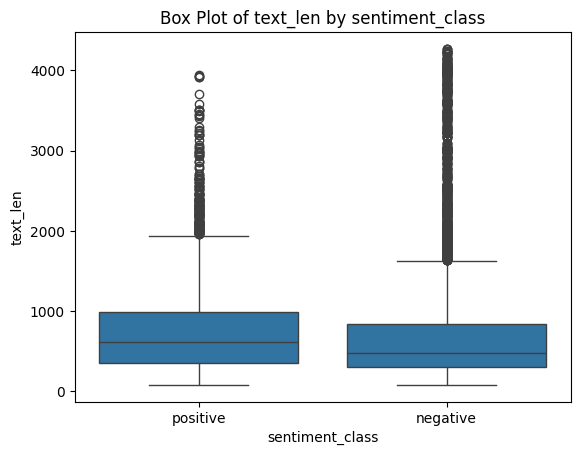

In [24]:
create_boxplot(df, 'text_len', 'sentiment_class')

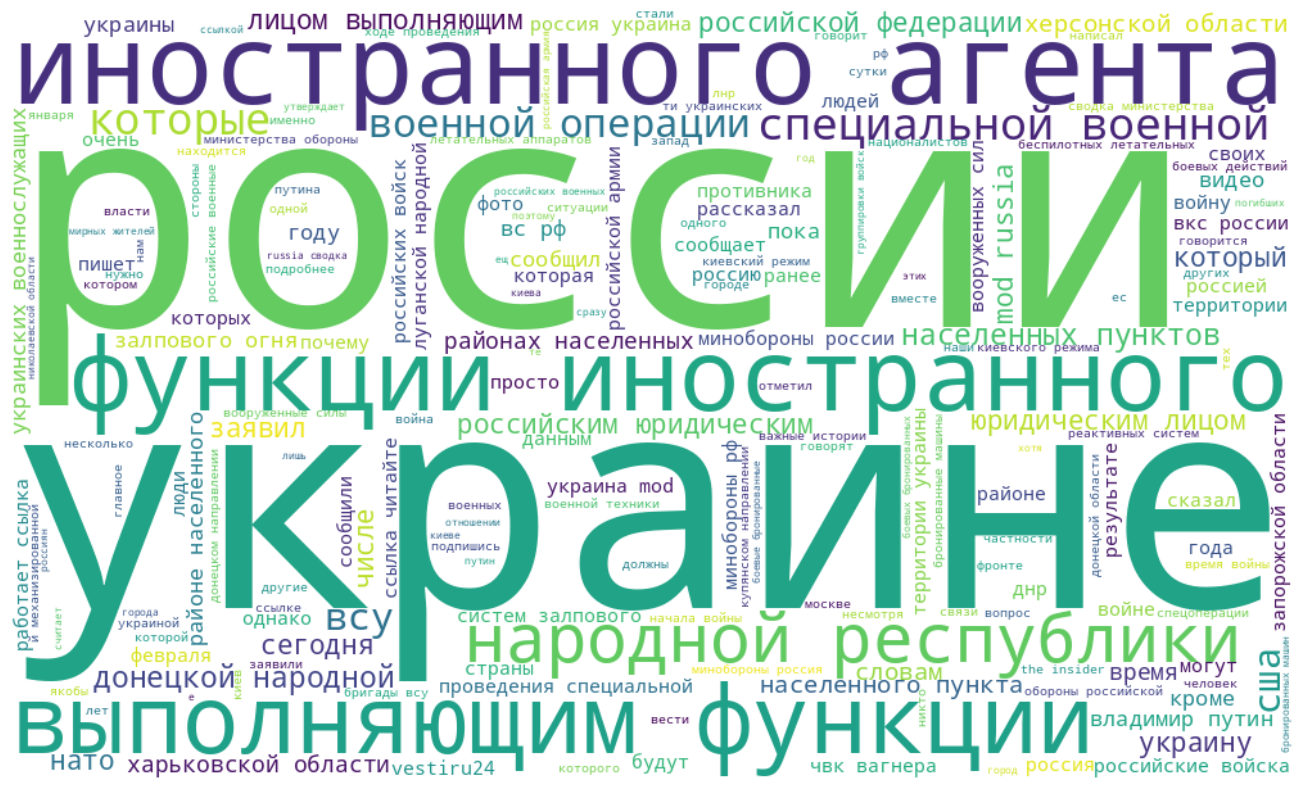

Word cloud saved to ./wordclouds/dataset_5_1_wordcloud.png


In [41]:
create_wordcloud(df, 'text_file_content', stop_words = set(ru_stopwords['word_list'].values), width = 1000, height=600, output_image_path='./wordclouds/dataset_5_1_wordcloud.png')

In [12]:
df['emojis_count'] = df['text_file_content'].apply(count_emojis)

In [13]:
df['emojis_count'].describe()

count    13114.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: emojis_count, dtype: float64

In [14]:
df['special_characters_count'] = df['text_file_content'].apply(count_special_characters)

In [15]:
df['special_characters_count'].describe()

count    13114.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: special_characters_count, dtype: float64

In [28]:
# df['language'] = df['text_file_content'].apply(detect_language_safe) #long execution time

In [29]:
df['language'].value_counts()

language
ru    13113
bg        1
Name: count, dtype: int64

In [38]:
df.loc[(df['language'] == 'bg'), ['text_file_content']].values[0][0]    #false bg

'    парламент финляндии ратифицирует членство в нато 28 февраля     глава комитета'

**Summary**

The dataset is designed for binary classification problem. It contains russian news about The Russo-Ukrainian War. The classes tells not about sentiment itself (in terms of text's emotion), but rather about news orientation towards Ukraine. 'Positive' news are more 'favorable' for Ukraine and 'negative' is unfavorable.  

### autotrain_TG_sentiment overview

**Understand the structure**

In [ ]:
df_1 = pd.read_csv('./data_provided/autotrain_TG_sentiment/processed/train/telegram_train.csv')

In [ ]:
df_1.info()  #train part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2399 non-null   object
 1   label   2399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [ ]:
df_2 = pd.read_csv('./data_provided/autotrain_TG_sentiment/processed/valid/telegram_validation.csv')

In [ ]:
df_2.info()  #validation part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    601 non-null    object
 1   label   601 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
df.isna().sum()  #No NA's

text     0
label    0
dtype: int64

In [ ]:
df.label.value_counts()  #classes imbalance

label
1    2208
0     792
Name: count, dtype: int64

In [60]:
2208 / 3000

0.736

**Manual inspection of examples**

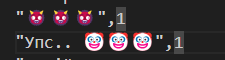

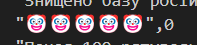

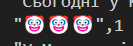

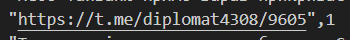

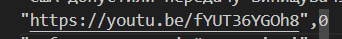

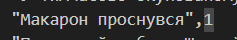

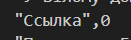

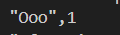

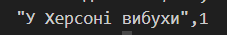

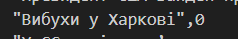

In [49]:
df.loc[(df['label'] == 1), 'text']

0                                                   Совок
1       Транш допомоги включатиме:  - 4 HIMARS і боєпр...
2       Зимова війна вигідна українцям, — міністр обор...
3       Гаазький суд зобов’язав рф виплатити 5 мільярд...
4       На «Рамштайні», 15 червня, обговорюватимуть де...
                              ...                        
2995    24 мільйона пішли фондам "Повернись живим" й С...
2996    ❗️Насамперед йдеться про одну роту танків Leop...
2997    Берлін погодився з кандидатурою нового посла У...
2998            Херсон. Мирные жители выгоняют оккупантов
2999    Сьогодні в районі Києва ППО збило 18 ракет із ...
Name: text, Length: 2208, dtype: object

In [47]:
df.loc[2997, 'text']

'Берлін погодився з кандидатурою нового посла України у Німеччині, — Spiegel.'

In [50]:
df.loc[2996, 'text']  

'❗️Насамперед йдеться про одну роту танків Leopard 2A6 (14 шт), — уряд ФРН.  Та невже..'

In [ ]:
df.loc[2999, 'text']  #Is it fully positive? Or possibly mixed? 

'Сьогодні в районі Києва ППО збило 18 ракет із 21, – голова КМВА'

In [51]:
df.loc[(df['label'] == 0), 'text']

9       Львів! Висока загроза ракетних обстрілів, — ме...
10      У Запоріжжі пролунало кілька вибухів, — секрет...
13      В Харькове после обстрелов на Салтовке загорел...
22                          Вибух у передмісті Запоріжжя.
26                                  Вибухи у Кривому Розі
                              ...                        
2981                                  Вибухи у Миколаєві.
2985    ❗️В «ДНР» предлагают применить химическое оруж...
2988    Загроза атаки дронами у Київській області, — К...
2989    На Вугледарському напрямку загинув Рома Іванен...
2990    Войска России продолжают наступление на Луганс...
Name: text, Length: 792, dtype: object

In [52]:
df.loc[2985, 'text']  

'❗️В «ДНР» предлагают применить химическое оружие против украинских военных, которые обороняются на «Азовстали».  «Штурмовать подземные укрепления "Азовстали" в Мариуполе смысла нет, поэтому нужно "обратиться к химическим войскам», - сказал представитель ОРДО Басурин.'

In [53]:
df.loc[13, 'text']  

'В Харькове после обстрелов на Салтовке загорелись две многоэтажки, а также припаркованные рядом автомобили, сообщает "Суспильне".'

In [54]:
df.loc[10, 'text']  

'У Запоріжжі пролунало кілька вибухів, — секретар Запорізької ради.  Частина з них – це відлуння ворожих прильотів у передмісті. Ще частина – вдала робота Сил протиповітряної оборони.'

**Basic overview**

In [56]:
df['text_len'] = df['text'].apply(len)

In [57]:
df['text_len'].describe()

count    3000.000000
mean      143.208000
std       163.370448
min         1.000000
25%        50.000000
50%       106.000000
75%       194.000000
max      3899.000000
Name: text_len, dtype: float64

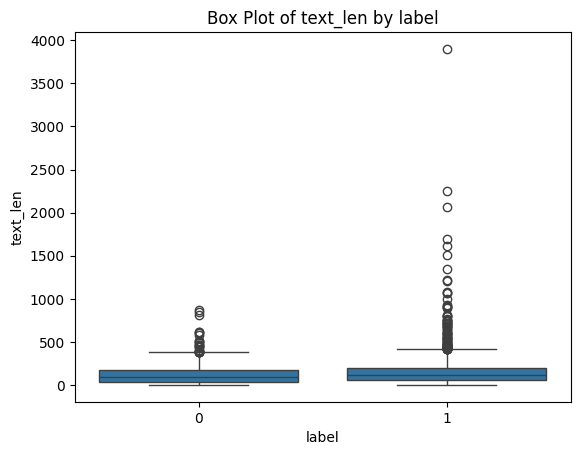

In [59]:
create_boxplot(df, 'text_len', 'label')

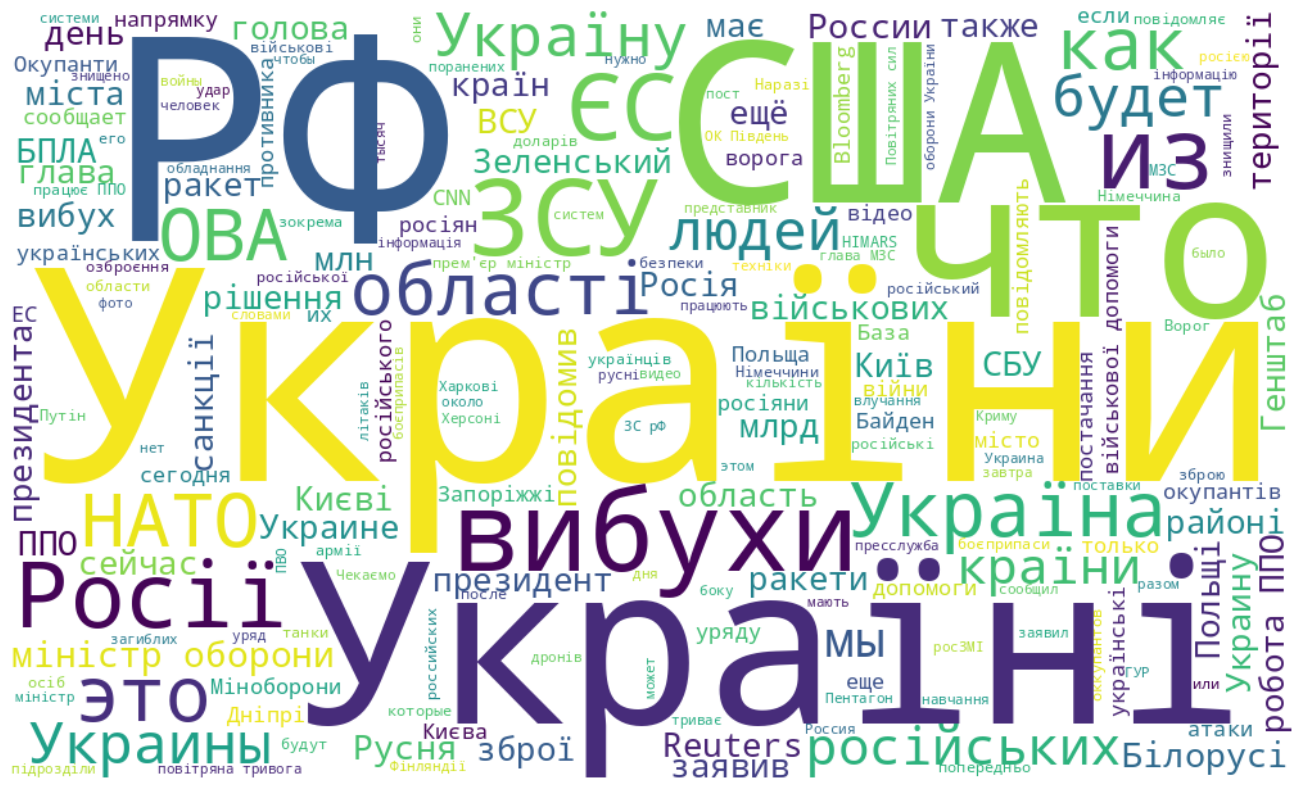

Word cloud saved to ./wordclouds/autotrain_tg_sentiment_wordcloud.png


In [65]:
create_wordcloud(df, 'text', stop_words = set(ua_stopwords['word_list'].values), width = 1000, height=600, output_image_path='./wordclouds/autotrain_tg_sentiment_wordcloud.png')

In [66]:
df['emojis_count'] = df['text'].apply(count_emojis)

In [67]:
df['emojis_count'].describe()

count    3000.000000
mean        0.354333
std         0.905753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: emojis_count, dtype: float64

In [70]:
df.loc[(df['emojis_count'] == 12), 'text'][1197]

'▪️СНБО на время военного положения запретил любую политическую деятельность таких партий:  🔸Оппозиционная платформа – За жизнь 🔸Партия Шария 🔸Наши 🔸Оппозиционный блок 🔸Левая оппозиция 🔸Союз левых сил 🔸Государство 🔸Прогрессивная социалистическая партия Украины 🔸Социалистическая партия Украины 🔸Социалисты 🔸Блок Владимира Сальдо'

In [73]:
len(df.loc[(df['emojis_count'] > 0)]) / df.shape[0]

0.217

In [74]:
df['special_characters_count'] = df['text'].apply(count_special_characters)

In [75]:
df['special_characters_count'].describe()

count    3000.000000
mean        5.054333
std         5.874142
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max       112.000000
Name: special_characters_count, dtype: float64

In [76]:
len(df.loc[(df['special_characters_count'] > 0)]) / df.shape[0]

0.8933333333333333

In [77]:
df['language'] = df['text'].apply(detect_language_safe) #long execution time

In [78]:
df['language'].value_counts()

language
uk         2144
ru          743
unknown      62
bg           36
mk           12
en            2
hr            1
Name: count, dtype: int64

In [88]:
df.loc[(df['language'] == 'ru'), ['text']].values[0][0]

'Совок'

In [89]:
df.loc[(df['language'] == 'ru'), ['text']].values[2][0]  

'Я вас умоляю, ложитесь спать пораньше Орки уже спецом с 3 до 5 утра обстреливают'

In [83]:
df.loc[(df['language'] == 'mk'), ['text']].values[0][0]  #false mk

'Перед сном — донатимо 6 грн 👹'

In [84]:
df.loc[(df['language'] == 'mk'), ['text']].values[1][0]  #false mk

'Краса'

In [82]:
df.loc[(df['language'] == 'hr'), ['text']].values[0][0]  #false hr

'…..  Фото: hromadske'

In [81]:
df.loc[(df['language'] == 'en'), ['text']].values[0][0]

'#RussiaIsATerroristState'

In [80]:
df.loc[(df['language'] == 'en'), ['text']].values[1][0]

'‼️Оборона  Маріуполя триває. Не зважаючи на переважаючі сили противника бійці полку АЗОВ проводять контратаку.  ‼️The defense of Mariupol continues. Despite the overwhelming forces of the enemy, the Azov Regiment fighters launch counterattack.'

**Summary**

The data contains logical contradictions in the classification of sentences with similar meaning. 

Also, there are noisy examples with no visible meaning at all (e.g. "Ooo"), so it will be impossible for a model to capture the useful information and to train efficiently.   


----


It contains news about The Russo-Ukrainian War from mostly 2 TG channels: "Lachen" and "Novynach". The classes tells not about sentiment itself (in terms of text's emotion), but rather about news orientation towards Ukraine. 'Positive' news are more 'favorable' for Ukraine and 'negative' is unfavorable.

The dataset is presented "as-is" without any preprocessing of special characters, emojis, stop-words etc.

### Emotions sentiment YouScan overview

https://youscan.io/blog/ukrainian-language-model/

**Understand the structure**

In [124]:
with open('./data_provided/emotions_sentiment_youscan/emotions_sentiment_youscan_annotator_1_Veronika.tsv','r', encoding='utf-8') as file_tsv:
    df_1=list(file_tsv)
    df_1=[e.replace('\n','').split('\t')[0:2] for e in df_1] #[1:652]

In [125]:
df_1 = pd.DataFrame(df_1, columns=['content', 'label'])

In [126]:
df_1.head()

content              label
0                                               text  overall sentiment
1  350к мешканців виїхало, житло зруйноване, але ...           Negative
2  А якщо воно не пошкоджене, але на ТОТ, то не в...            Neutral
3  Мариуполь, они Херсон освободили и болт на нег...      Very Negative
4  Интересно какой сейчас можно купить дом за 500...           Negative

In [127]:
df_1.tail()

content label
7509  ❌Прем'єр-міністр Денис Шмигаль розкритикував м...      
7510  Відтепер в Дії можна подати заявку на ремонт п...      
7511  Отже, інша сторона допису Садового.  Підписник...      
7512  Через державну програму «єВідновлення» українц...      
7513  А євідновлення подать заявку на получение выпл...

In [128]:
df_1.drop(0, inplace=True)

In [129]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 1 to 7513
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7513 non-null   object
 1   label    7513 non-null   object
dtypes: object(2)
memory usage: 117.5+ KB


In [130]:
with open('./data_provided/emotions_sentiment_youscan/emotions_sentiment_youscan_annotator_3_Hanna.tsv','r', encoding='utf-8') as file_tsv:
    df_2=list(file_tsv)
    df_2=[e.replace('\n','').split('\t')[0:2] for e in df_2]

In [131]:
df_2 = pd.DataFrame(df_2, columns=['content', 'label'])

In [132]:
df_2.head()

content              label
0                                               text  overall sentiment
1  350к мешканців виїхало, житло зруйноване, але ...           Negative
2  А якщо воно не пошкоджене, але на ТОТ, то не в...            Neutral
3  Мариуполь, они Херсон освободили и болт на нег...      Very Negative
4  Интересно какой сейчас можно купить дом за 500...           Negative

In [133]:
df_2.tail()

content label
7509  ❌Прем'єр-міністр Денис Шмигаль розкритикував м...      
7510  Відтепер в Дії можна подати заявку на ремонт п...      
7511  Отже, інша сторона допису Садового.  Підписник...      
7512  Через державну програму «єВідновлення» українц...      
7513  А євідновлення подать заявку на получение выпл...

In [134]:
df_2.drop(0, inplace=True)

In [135]:
df_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 1 to 7513
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7513 non-null   object
 1   label    7513 non-null   object
dtypes: object(2)
memory usage: 117.5+ KB


It seems that two files contain the same information but labeled by two different individuals. 

In [136]:
df_1.label.value_counts()

label
                 6863
Negative          242
Neutral           212
Very Negative      78
Positive           75
Mixed              37
Very Positive       6
Name: count, dtype: int64

In [137]:
df_2.label.value_counts()

label
                 7214
Neutral           114
Negative           94
Very Negative      37
Mixed              28
Positive           23
Very Positive       3
Name: count, dtype: int64

In [140]:
6863 / 7513  #90% of unlabeled data

0.9134832956209238

In [141]:
df = df_1.copy()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 1 to 7513
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7513 non-null   object
 1   label    7513 non-null   object
dtypes: object(2)
memory usage: 117.5+ KB


In [144]:
df.label.value_counts()  #classes imbalance

label
                 6863
Negative          242
Neutral           212
Very Negative      78
Positive           75
Mixed              37
Very Positive       6
Name: count, dtype: int64

**Manual inspection**

In [179]:
df.label.unique()

array(['Negative', 'Neutral', 'Very Negative', 'Positive',
       'Very Positive', 'Mixed', ''], dtype=object)

In [198]:
sample = df.loc[(df['label'].isin(['Negative', 'Neutral', 'Very Negative', 'Positive',
       'Very Positive', 'Mixed'])), :].sample(30)

In [199]:
for i, row in sample.iterrows():

    print(f"{row['label']}: {row['content']}")

Very Negative: Сепарша пошла нахер
Negative: @Дія Продовжую мучитися. Трошки просунулася... Заяву про пошкоджене майно вже подала. Далі... Зайшла у розділ "Подати заяву про виплату". Вискочив напис: "На жаль, послуга недоступна Дія не знайшла дані про співвласників майна. .... Зверніться до ЦНАПу..." У двох співвласників інформація про майно підтягується в їхніх Діях. А ще одна співвласниця знаходиться за кордоном, але надіслала мені довіреність. Дані про усіх співвласників ТОЧНО знаходяться у державному реєстрі речових прав на нерухоме майно. Всі витяги у мене є у паперовому вигляді - зовсім нові, у цьому місяці зроблені нотаріусом.  Тобто це *Дія не бачить цих співвласників!!* І тому у Дії нема qr-коду, щоб співвласники підтвердили згоду - так, як вказано у цьому відео на 2:03 - нема нічого подібного.  То що - йти до ЦНАПу? - ну дякую, Дія. Прекрасна послуга. Шкода тільки, що не працює.
Negative: Вибори на носі... гречка
Mixed: а то мне обычно русские пишут. А ДОКАЖИ ЧТО ЭТО МЫ СДЕЛА

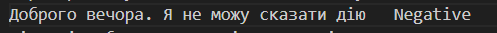

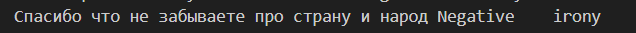

**Basic overview**

In [145]:
df['text_len'] = df['content'].apply(len)

In [146]:
df['text_len'].describe()

count    7513.000000
mean      203.071476
std       333.327830
min         1.000000
25%        42.000000
50%        91.000000
75%       227.000000
max      5749.000000
Name: text_len, dtype: float64

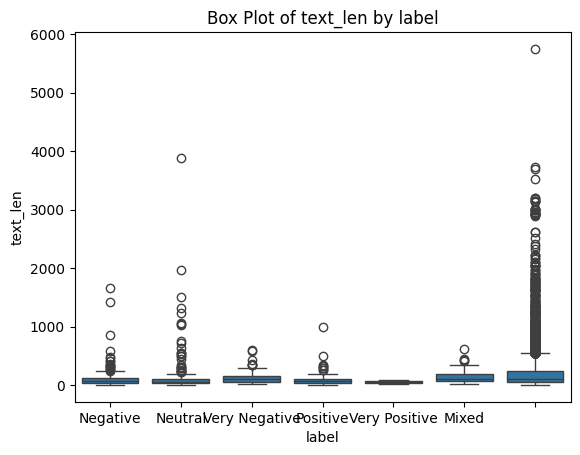

In [147]:
create_boxplot(df, 'text_len', 'label')

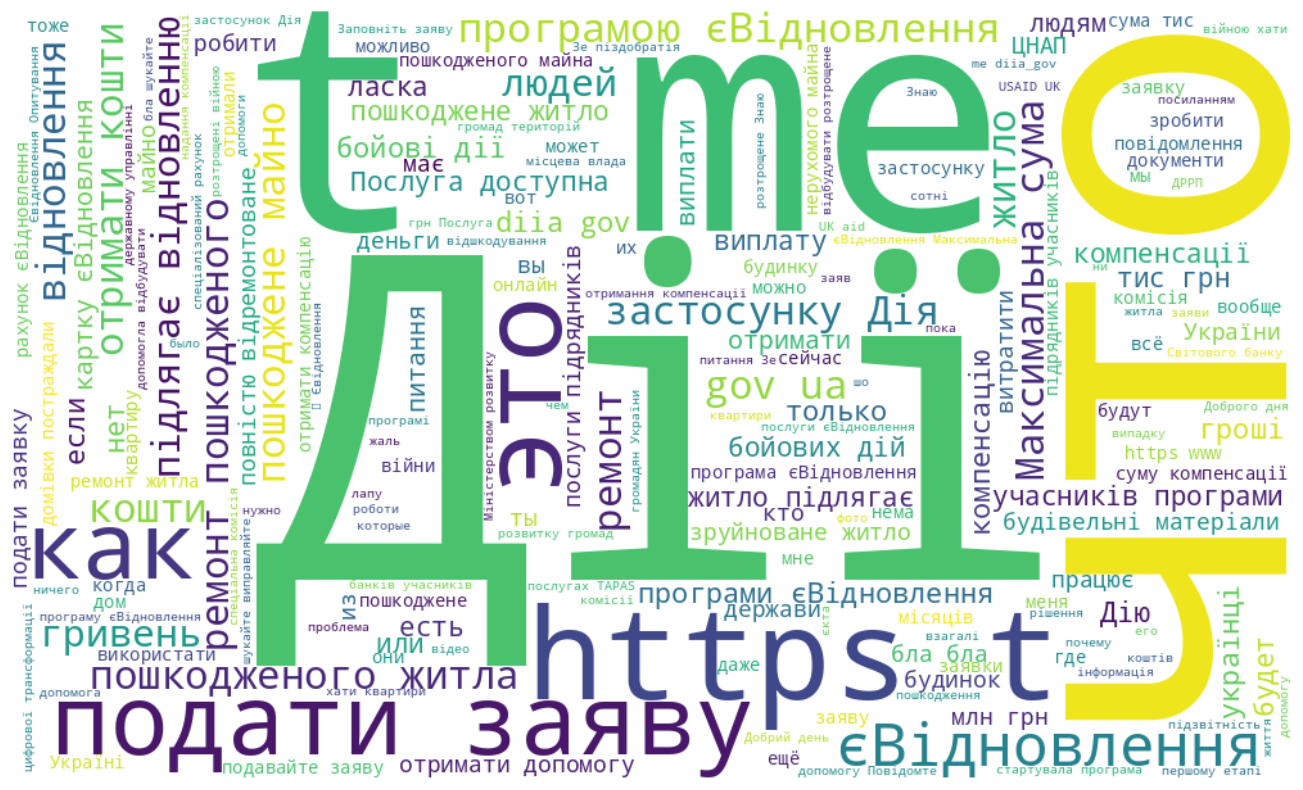

Word cloud saved to ./wordclouds/emotions_sentiment_youscan_wordcloud.png


In [148]:
create_wordcloud(df, 'content', stop_words = set(ua_stopwords['word_list'].values), width = 1000, height=600, output_image_path='./wordclouds/emotions_sentiment_youscan_wordcloud.png')

In [149]:
df['emojis_count'] = df['content'].apply(count_emojis)

In [150]:
df['emojis_count'].describe()

count    7513.000000
mean        0.158392
std         0.836430
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        32.000000
Name: emojis_count, dtype: float64

In [152]:
df.loc[(df['emojis_count'] == 32), 'content'][4807]

'⛑карта Євідновлення від Пумб - https://t.me/zarobitok2022/8196 ⛑порядок отримання допомоги за житло - https://erecovery.diia.gov.ua ⛑Отримати волонтерську допомогу - https://bit.ly/3QnMR2B ⛑Надати волонтерську допомогу - https://bit.ly/3GNlVpR ⛑Отримати допомогу від 1kproject - https://www.1kproject.org ✔Отримай безкоштовно токени гаманця Slavi - https://bit.ly/42tiRrd ✔Отримай 3$ від біржі Zenit по силці - http://surl.li/hgxgm ✔Отримай до 2500$ від LOTTRADE по силці - https://bit.ly/3Mf7cW2 ✔Отримай 20$ від Slex по силці - http://surl.li/hfwtn ✔Отримай по 1$ за друга від Arcomia по силці - http://surl.li/hfwwi ✔Отримай 50$-200$ від Magic Square по силці - https://bit.ly/3BiIlMf ✔Отримай до 100$ від біржі Woo по силці - https://bit.ly/3BhH5sB ✔Отримай без вкладень гроші від укр.банків - https://bit.ly/3VTHCdC ✔Отримай криптовалюту OMEGA по силці - https://bit.ly/3o0EMXI ✔Отримай до 100$ від BingX по силці - https://bit.ly/40ieCxm ✔Отримай 25$-1000$ від Ascendex по силці - https://bit.

In [153]:
df.loc[(df['emojis_count'] == 32), 'label'][4807]

''

In [154]:
len(df.loc[(df['emojis_count'] > 0)]) / df.shape[0]

0.07214162118993744

In [155]:
df['special_characters_count'] = df['content'].apply(count_special_characters)

In [156]:
df['special_characters_count'].describe()

count    7513.000000
mean        8.640091
std        17.808003
min         0.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       596.000000
Name: special_characters_count, dtype: float64

In [157]:
len(df.loc[(df['special_characters_count'] > 0)]) / df.shape[0]

0.8663649673898576

In [158]:
df['language'] = df['content'].apply(detect_language_safe) #long execution time

In [159]:
df['language'].value_counts()

language
uk         4584
ru         2546
bg          172
mk          131
en           34
unknown      28
it            4
et            3
af            2
ca            2
no            2
de            1
sq            1
cy            1
sv            1
he            1
Name: count, dtype: int64

In [176]:
34 / 7513

0.004525489152136297

In [170]:
df.loc[(df['language'] == 'ru'), ['content']].values

array([['Мариуполь, они Херсон освободили и болт на него забили, как будто его не существует, а вы про Мариуполь...'],
       ['Интересно какой сейчас можно купить дом за 500к грн? Участок разве что'],
       ['А Мариуполь мрази слили,и забыли.'],
       ...,
       ['Подскажите ,существует ли еще помощь города установка окон пострадавшим от взрыва?'],
       ['Здравия Вам. Вот смотрите интересный нюанс. Пока идут вбросы про Бахмут и Белгород, они постепенно с нарушением всех прав и свобод человека, делают то, что нам аукнется уже скоро.  Прость взяли и внесли законопроект, который позволит спокойно передавать'],
       ['А євідновлення подать заявку на получение выплаты что выдает? вчера пошла в горисполком в 118-2 т к реестры на на наш город закрыты надо ехать в Дружковка и дали номер телефона цнап Дружковка а там сказали надо переделать документы на электронные ,а это в БТИ сегодня пошла это удовольствие 3200 гривен плюс банковские операции']],
      dtype=object)

In [171]:
df.loc[(df['language'] == 'mk'), ['content']].values #false mk

array([['Весела держава! Хоч не вбили та не посадили!'],
       ['А де ремонт робити?)) Чи зберігати поки житло не купиш?)'],
       ['Не купити'],
       ['Нам не надо , на нас забили давно'],
       ['Що таке ОМС?'],
       ['Ну вот проверили)'],
       ['Согласна'],
       ['Згодна з вами'],
       ['78000 не хватит на покупку дома, или квартиры.'],
       ['Це де?'],
       ['Хз значит гепадрочер'],
       ['Так то про документи...'],
       ['Невже  То треба було чекати 1,5 роки'],
       ['Претендувати'],
       ['ну не все ж пока под снос'],
       ['Ну за то факт'],
       ['у банка нет дотупа к информации'],
       ['4 млдр евро..'],
       ['Кто продаст квартиру за сертификат?'],
       ['шикарно'],
       ['30к на одну заяву, то небагато'],
       ['Ну им хватит не на долго))'],
       ['то где такое?'],
       ['Зеле не хватит'],
       ['Так'],
       ['Хоч би не пи-ли...'],
       ['вони ци гроши незаслужили'],
       ['Что за цирк \u200d♂'],
       ['Пилаааааа'],
       

In [172]:
df.loc[(df['language'] == 'bg'), ['content']].values

array([['А якщо воно не пошкоджене, але на ТОТ, то не втрачене?'],
       ['а то, не дают, не платят'],
       ['Де?????'],
       ['Отож'],
       ['В Европе давно \u200d♀️'],
       ['ок'],
       ['Телемарафон'],
       ['Так тебя за твои фантазии и пусто словие на парашу и отправят'],
       ['Не писди'],
       ['Аби ото не гавкали'],
       ['Якщо це наш план, то я згоден'],
       ['А давай'],
       ['Азаров, ти ???'],
       ['Видимо и ему надо по спать'],
       ['Та ото ж)))))))'],
       ['То дипфейки и монтаж)'],
       ['Женщина*'],
       ['Упс ... :) нежданчик'],
       ['та понятно что не юр'],
       ['Тоже самое'],
       ['Ща ща'],
       ['I ще,- пiшов нахуй рашист сука!'],
       ['Давайте рекламу майстра по антенам'],
       ['Олег, поясните пожалуйста.'],
       ['нет'],
       ['Героям Слава'],
       ['А если не хватит?'],
       ['Мне хватит'],
       ['Нет'],
       ['щас'],
       ['им не хватит'],
       ['маловато будет'],
       ['Работа'],
       ['Вийд

In [173]:
df.loc[(df['language'] == 'en'), ['content']].values

array([["CONGRATULATIONS On your successful investment! Access to a good information is very good, and It's always exciting to see your money grow in such a short span of time. It sounds like you've discovered a valuable lesson about the power of investing wisely"],
       ["I had a nice trading experience with her,and I have never seen any of Jade Hawkins client's complain about, or scammed I think she is a professional broker"],
       ['@jadehawkins...... I just texted her hope she replies me soon thank you very much'],
       ['Job will pay your bills, business will make you rich but investment makes and keep you wealthy, the future is inevitable'],
       ['I invest with her too, I make about $9K weekly,she does a great job'],
       ["No I don't give her my funds, It stays right in my trading account. My account only mirrors her trades in real time that's the ideal for this system. Copy trading is 100% secured and very transparent to work with her, you have total control over you

In [200]:
df.loc[(df['language'] == 'de'), ['content']].values

array([['Red']], dtype=object)

In [212]:
df.loc[(df['language'] == 'et'), ['content']].values

array([['idi v ofis.'],
       ['Це e-Ukraine ☺️'],
       ['Ukraine Poland']], dtype=object)

In [202]:
df.loc[(df['language'] == 'sq'), ['content']].values

array([['Krashe nahui']], dtype=object)

In [203]:
df.loc[(df['language'] == 'af'), ['content']].values

array([['*@Jadehawkins*'],
       ['Sense Bank']], dtype=object)

In [204]:
df.loc[(df['language'] == 'cy'), ['content']].values

array([['Hi BJ i hi BJ CT no']], dtype=object)

In [211]:
df.loc[(df['language'] == 'sv'), ['content']].values

array([['@tviyDimKharkivBot']], dtype=object)

In [206]:
df.loc[(df['language'] == 'he'), ['content']].values

array([["GLORY TO UKRAINE AND UKRAINE HERO'S תחי אוקראינה היקרה"]],
      dtype=object)

In [207]:
df.loc[(df['language'] == 'no'), ['content']].values

array([['Тарас !report bot'],
       ['Що по stereo?']], dtype=object)

In [208]:
df.loc[(df['language'] == 'ca'), ['content']].values

array([['excel ☠️'],
       ['В ЦНАП м. Харкова не надається така послуга. Вам потрібно звернутися до Управління соціального захисту населення за місцем перебування https://soczahist.kharkov.ua/%d0%be%d1%81%d0%bd%d0%be%d0%b2%d0%bd%d1%96-%d0%bd%d0%b0%d0%bf%d1%80%d1%8f%d0%bc%d0%ba%d0%b8-%d0%b4%d1%96%d1%8f%d0%bb%d1%8c%d0%bd%d0%be%d1%81%d1%82%d1%96/%d1%83%d0%bf%d1%80%d0%b0%d0%b2%d0%bb%d1%96%d0%bd%d0%bd%d1%8f-%d0%bf%d1%80%d0%b0%d1%86%d1%96-%d1%82%d0%b0-%d1%81%d0%be%d1%86%d1%96%d0%b0%d0%bb%d1%8c%d0%bd%d0%be%d0%b3%d0%be-%d0%b7%d0%b0%d1%85%d0%b8/ Управління соціального захисту населення Переглянути новини УПРАВЛІННЯ СОЦІАЛЬНОГО ЗАХИСТУ НАСЕЛЕННЯ АДМІНІСТРАЦІЙ РАЙОНІВ ХАРКІВСЬКОЇ МІСЬКОЇ РАДИ… https://soczahist.kharkov.ua/%d0%be%d1%81%d0%bd%d0%be%d0%b2%d0%bd%d1%96-%d0%bd%d0%b0%d0%bf%d1%80%d1%8f%d0%bc%d0%ba%d0%b8-%d0%b4%d1%96%d1%8f%d0%bb%d1%8c%d0%bd%d0%be%d1%81%d1%82%d1%96/%d1%83%d0%bf%d1%80%d0%b0%d0%b2%d0%bb%d1%96%d0%bd%d0%bd%d1%8f-%d0%bf%d1%80%d0%b0%d1%86%d1%96-%d1%82%d0%b0-%d1%81%d0%be%d1%86%

In [210]:
df.loc[(df['language'] == 'unknown'), ['content']].values

array([['\u200d♀️\u200d♀️\u200d♀️'],
       ['✉'],
       ['+'],
       ['-'],
       ['87970862163'],
       ['376032'],
       ['https://vm.tiktok.com/ZMjQGXWv2/'],
       ['https://m.facebook.com/story.php?story_fbid=pfbid0333WKmHZqNouuS196kQx9pjT1GY27wK5S1Z625qjxqEvkF3xHfLYgyRMR4oeAPBDNl&id=100008607012087'],
       ['https://vm.tiktok.com/ZMjHS2PUq/'],
       ['('],
       ['☺️'],
       ['❤️'],
       ['✅'],
       ['\u200d♂️'],
       ['https://t.me/c/1466564392/367537'],
       ['.'],
       ['100%'],
       ['00:12'],
       ['508749855'],
       ['https://ukurier.gov.ua/uk/news/ponad-1400-zayavnikiv-u-mezhah-programi-yevidnovle/'],
       ['24 )'],
       ['\u200d♀️'],
       ['?'],
       ['.,:;!?'],
       ['https://news-ua.pl/2023/05/07/naselenie-opoveshayt-o-neobhodimosti/'],
       ['❤️\u200d'],
       ['https://t.me/c/1533895094/31831'],
       ['https://youtu.be/fm_Tq49NVsI']], dtype=object)

**Summary**

There are two files with the same data labeled by two different persons. 

The dataset contains mostly comments of people from Ukrainian segment of Telegram. The classes show the emotion expressed in the text. Here is the highest quality of labels among all datasets. 

There are spam messages detected (mostly all in English). 

The dataset is presented "as-is" without any preprocessing of special characters, emojis, stop-words etc.

### Kyiv digital sentiment annotation overview (Semanticforce?)

https://semanticforce.ai/

**Understand the structure**

In [216]:
with open('./data_provided/kyiv_digital_sentiment_annotation/kyiv_digital_sentiment_annotation_annotator_x.tsv','r', encoding='utf-8') as file_tsv:
    df=list(file_tsv)
    df=[e.replace('\n','').split('\t')[0:2] for e in df] #[1:652]

In [218]:
df = pd.DataFrame(df, columns=['content', 'label'])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 1 to 563
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  563 non-null    object
 1   label    563 non-null    object
dtypes: object(2)
memory usage: 8.9+ KB


In [220]:
df

content     label
0                                              content     label
1                     Шо по відключень енергії в Києві  Negative
2    Збудували фізичний захист для енергообʼєктів К...  Positive
3    Так я ж тебе задал вопрос. Киев, май, первое п...  Positive
4                                               Аварії  Negative
..                                                 ...       ...
559  ‼️Київ. Запрошуємо до співпраці у велику компа...  Positive
560  Я не я і хата метро не моє. Десь таке загальне...  Negative
561  У меня соседа в начале января приняли на Троещ...   Neutral
562  Обґрунтований тариф на проїзд у Київському мет...  Negative
563  В районе Дарницкого вокзала свет пропал у кого...  Negative

[564 rows x 2 columns]

In [223]:
df.drop(0, inplace=True)

In [224]:
df.isna().sum()

content    0
label      0
dtype: int64

In [225]:
df.label.value_counts()

label
Negative    323
Positive    169
Neutral      71
Name: count, dtype: int64

**Manual inspection**

In [229]:
df.label.unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [230]:
sample = df.sample(30)

In [231]:
for i, row in sample.iterrows():

    print(f"{row['label']}: {row['content']}")

Positive: Тунель між «Либідською» та «Деміївською» повністю перебудують 🚇  Для підтримки ремонтних робіт вже встановлені конструкції-риштування.  Він повідомив про те, що тунель між станціями «Либідська» та «Деміївська» буде повністю перебудований. Ця реконструкція включатиме розбір старої ділянки тунелю та створення нової монолітної ділянки. Роботи проводитимуться відкритим способом.  Нову ділянку тунелю, завдовжки 27 метрів, планують зробити монолітною, замість збірно-залізобетонної, через нестабільні ґрунти. Остаточної форми тунелю ще не визначено, але розглядають прямокутний та круглий варіанти.  Під час ремонту навколо тунелю буде встановлена водонепроникна конструкція, а вода буде відкачана у пливун, який оточує тунель. Цю конструкцію залишать і після завершення ремонту. Тунель також буде підсилено металевими конструкціями та застосовано спеціальний полімер для гасіння вібрації від потягів.
Neutral: 👥Менеджер з продажів автомобілів #офлайнробота  💰25 000 – 75 000 грн (% від прода

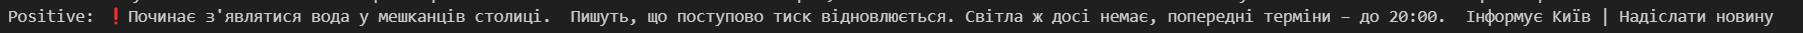

Mixed will be better option 

In [232]:
sample = df.sample(30)

In [233]:
for i, row in sample.iterrows():

    print(f"{row['label']}: {row['content']}")

Positive: В Києві знайти роботу можна.Хто хоче той працює.Ідіть працюйте, оплачуйте послуги.Надаються субсидії малозабезпеченим.
Negative: В Киеве и Днепропетровской должникам 70 000 человек - отключат свет.❌💡 Долгов на 600 млн. гривен. Компания ясно обещает делать это "не больно", согласно "четкими критериями и по сумме, и по «возрасту» задолженности". Конечно мы им поверили. 😉 Ну что здобулы? Киевская клика теперь сбросила маску "заботливой власти", теперь притворяться не зачем.  Нужно вытянуть деньги из народа, даже если людям будет нечего есть. Главное, заплати за электричество.   #насамомделе #насамомделевкиеве #киев #kиїв  Наш канал | Наш чат | Наш бот
Positive: Я їхав сьогодні все ок було з опаленням. Маршрут, що о 9.54 виїздить з Київ-пасажирського в сторону Дарниці.
Negative: ❗️ДТП на Повітрофлотському: на місці було п'ять швидких  Рух ускладнений від Огієнко в сторону шляхопроводу.  Очевидці повідомляють, що було п'ять швидких. Зараз вже лишилися патрульні і дві розбиті автів

Neutral: 

Компанія Hall Team шукає «ОПЕРАТОРА ЧАТУ/АРБІТРАЖ КРИПТОВАЛЮТ» (розглядаємо без досвіду)🎉 📌Місто Київ, не віддалено  💵Заробітня плата щотижднева від 500$ Графік: ПН-ПТ, 10:30 -18:00  Вимоги: • Швидке друкування • Вміння працювати з соціальними мережами, месенджерами. • Пунктуальність, відповідальний підхід до роботи.  Ваші обов’язки: • Спілкування з клієнтами в текстовому форматі в месенджерах  Умови роботи: • Час обіду та кофе-брейки у будь-який комфортний час • Щотиждневі виплати • Ставка + % • Швидке навчання та підтримка від керівництва • Додаткові плюшки та бонуси  👩‍💻 Пиши плюсик у повідомлення💰


**Basic overview**

In [234]:
df['text_len'] = df['content'].apply(len)

In [235]:
df['text_len'].describe()

count     563.000000
mean      376.330373
std       372.943840
min         6.000000
25%       123.500000
50%       263.000000
75%       478.000000
max      3083.000000
Name: text_len, dtype: float64

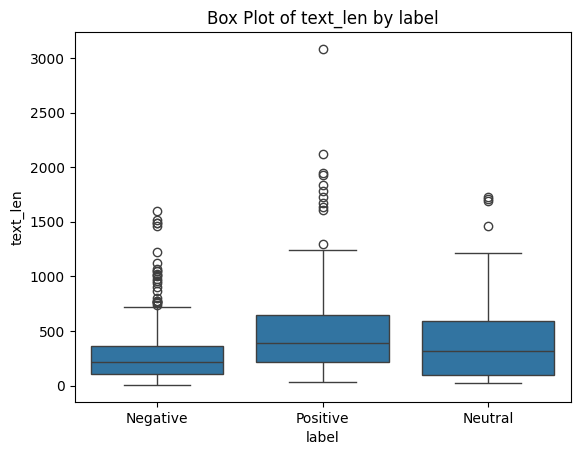

In [236]:
create_boxplot(df, 'text_len', 'label')

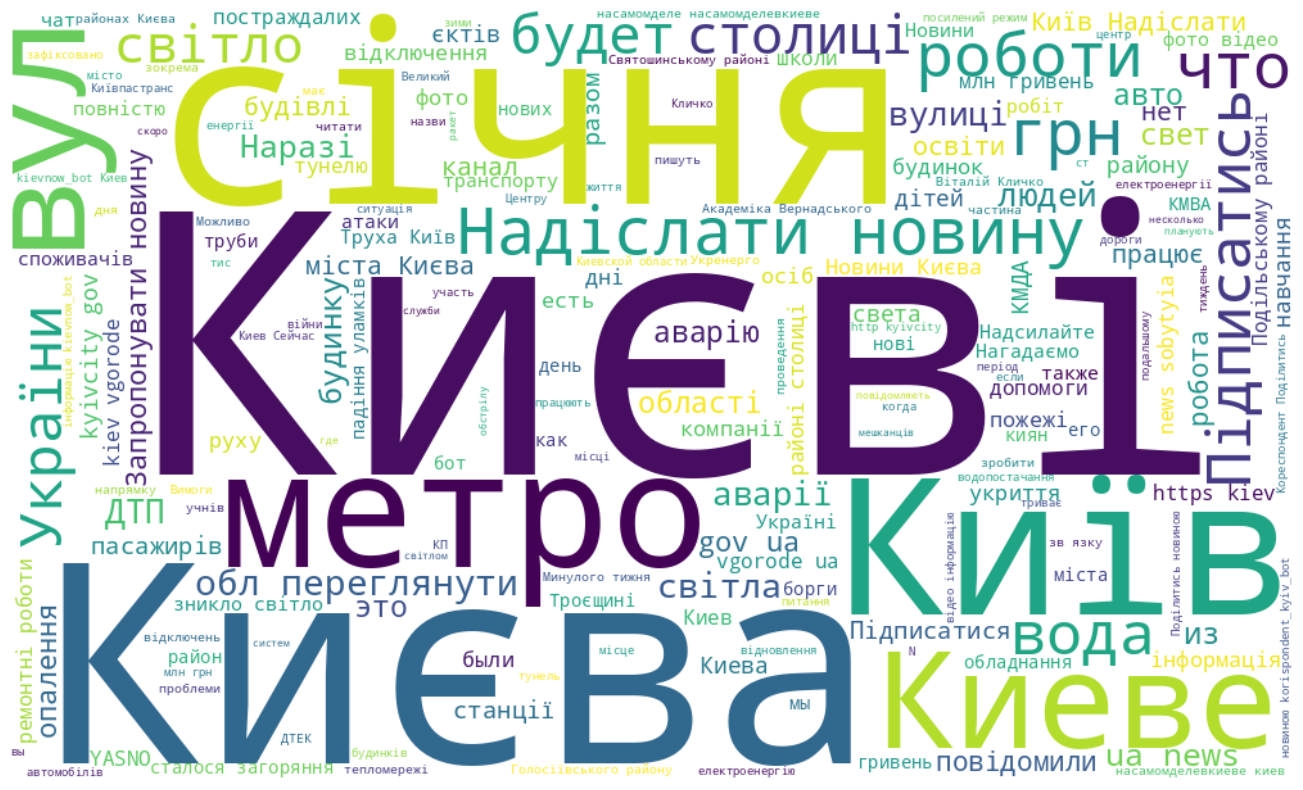

Word cloud saved to ./wordclouds/kyiv_digital_sentiment_wordcloud.png


In [237]:
create_wordcloud(df, 'content', stop_words = set(ua_stopwords['word_list'].values), width = 1000, height=600, output_image_path='./wordclouds/kyiv_digital_sentiment_wordcloud.png')

In [238]:
df['emojis_count'] = df['content'].apply(count_emojis)

In [239]:
df['emojis_count'].describe()

count    563.000000
mean       1.573712
std        2.785860
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       32.000000
Name: emojis_count, dtype: float64

In [241]:
df.loc[(df['emojis_count'] == 32), 'content'][274]

'‼️‼️‼️‼️‼️  ➡️В УКРАЇНІ ЗАПРОВАДЯТЬ ПЛАНОВІ ВІДКЛЮЧЕННЯ СВІТЛА — Омельченко  ⚡️Вже є графіки відключень для кожного міста. Щоб подивитись, обирай свій регіон, та натискай «переглянути».  📋Київ та обл. - [переглянути] 📋Вінницька обл. - [переглянути] 📋Волинська обл. - [переглянути] 📋Дніпропетровська обл. - [переглянути] 📋Донецька обл. - [переглянути] 📋Житомирська обл. - [переглянути] 📋Закарпатська обл. - [переглянути] 📋Запорізька обл. - [переглянути] 📋Івано-Франківська обл. - [переглянути] 📋Київська обл. - [переглянути] 📋Кіровоградська обл. - [переглянути] 📋Львівська обл. - [переглянути] 📋Миколаївська обл. - [переглянути] 📋Одеська обл. - [переглянути] 📋Полтавська обл. - [переглянути] 📋Рівненська обл. - [переглянути] 📋Сумська обл. - [переглянути] 📋Тернопільська обл. - [переглянути] 📋Харківська обл. - [переглянути] 📋Херсонська обл. - [переглянути] 📋Хмельницька обл. - [переглянути] 📋Черкаська обл. - [переглянути] 📋Чернівецька обл. - [переглянути] 📋Чернігівська обл. - [переглянути]  ❗️Відпр

In [242]:
len(df.loc[(df['emojis_count'] > 0)]) / df.shape[0]

0.5204262877442274

In [243]:
df['special_characters_count'] = df['content'].apply(count_special_characters)

In [244]:
df['special_characters_count'].describe()

count    563.000000
mean      15.630551
std       17.516700
min        0.000000
25%        5.000000
50%       11.000000
75%       20.000000
max      145.000000
Name: special_characters_count, dtype: float64

In [245]:
len(df.loc[(df['special_characters_count'] > 0)]) / df.shape[0]

0.9698046181172292

In [246]:
df['language'] = df['content'].apply(detect_language_safe) #long execution time

In [247]:
df['language'].value_counts()

language
uk    452
ru    109
bg      2
Name: count, dtype: int64

In [248]:
df.loc[(df['language'] == 'ru'), ['content']].values

array([['Так я ж тебе задал вопрос. Киев, май, первое применение пэтриотов - когда все небо осветили этим - были там и х22, и кинжалы - так были прилеты тогда? Не было. Вопрос залу - почему так произошло?  Пэтриоты сбивают всю эту срань.'],
       ['В Киеве продолжать звучать взрывы. СМИ сообщают, что в ряде районов пропал свет.'],
       ['в святошинском районе нет света в некоторых домах'],
       ['В Киеве частично пропал свет — часть объектов и жилых домов в нескольких районах столицы обесточены.'],
       ['❌\U0001f6dc Пишут о проблемах со связью в Киеве. Также есть проблемы со светом и водой.    #насамомделе #насамомделевкиеве #киев #kиїв  Наш канал | Наш чат | Наш бот'],
       ['В некоторых районах Киева также пропала вода, пишут подписчики'],
       ['В некоторых районах Киева пропала вода, пишут СМИ.  Тем временем военная администрация заявила, что обломки ракет найдены и в Святошинском районе.'],
       ['Жители района Оболонь в Киеве сообщают, что у них пропали и свет, и во

In [249]:
df.loc[(df['language'] == 'bg'), ['content']].values #false bg

array([['Смотрю, света в половине Киева нет?'],
       ['Когда в трубе трещина переезжайте на Троещину)']], dtype=object)

**Summary**

The dataset contains mostly Telegram posts and some comments from Ukrainians. The classes show the emotion expressed in the text. Labels are without many contadictions. 

There are spam messages detected.

The dataset is presented "as-is" without any preprocessing of special characters, emojis, stop-words etc.

Semantic force data?

### TRWU (**T**elegram news about the **R**ussian **W**ar in **U**kraine) overview

Collection guidelines are described in details in the following paper: 


https://aclanthology.org/2024.unlp-1.5/

**Understand the structure**

In [251]:
df = pd.read_csv('./data_provided/trwu/trwu.tsv',sep='\t')

In [253]:
del df['Unnamed: 0']

In [257]:
df['Date'] = pd.to_datetime(df['Date'])

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276309 entries, 0 to 276308
Data columns (total 9 columns):
 #   Column                                  Non-Null Count   Dtype              
---  ------                                  --------------   -----              
 0   message_id                              276309 non-null  int64              
 1   Date                                    276309 non-null  datetime64[ns, UTC]
 2   text                                    276309 non-null  object             
 3   channel_name                            276309 non-null  object             
 4   channel_attitude                        276309 non-null  object             
 5   gpt_geopolitical_attitude_standardized  276309 non-null  object             
 6   gpt_sentiment                           276309 non-null  object             
 7   pymorphy_sentiment                      276309 non-null  object             
 8   gpt_hate_or_discrimination              276309 non-null  object  

In [259]:
df['gpt_sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [260]:
df['gpt_sentiment'].value_counts()

gpt_sentiment
negative    146808
neutral      92331
positive     37170
Name: count, dtype: int64

In [261]:
df['pymorphy_sentiment'].value_counts()

pymorphy_sentiment
negative    199403
positive     62961
neutral      13945
Name: count, dtype: int64

In [263]:
df['channel_attitude'].value_counts()

channel_attitude
pro-ru    152502
pro-ua    123807
Name: count, dtype: int64

In [264]:
df['channel_name'].value_counts()

channel_name
rian_ru              79663
ROSSIYA_SEGODNIA     69238
uniannet             67727
radiosvoboda         33220
UkrPravdaMainNews    22860
ZE_kartel             3601
Name: count, dtype: int64

In [265]:
df['gpt_geopolitical_attitude_standardized'].value_counts()

gpt_geopolitical_attitude_standardized
not applicable    129665
pro-ukrainian      82120
pro-russian        64306
other                138
pro-american          80
Name: count, dtype: int64

In [266]:
df['gpt_hate_or_discrimination'].value_counts()

gpt_hate_or_discrimination
no     260493
yes     15816
Name: count, dtype: int64

**Manual inspection**

In [271]:
df.gpt_sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [272]:
sample = df.sample(30)

In [273]:
for i, row in sample.iterrows():

    print(f"{row['gpt_sentiment']}: {row['text']}")

neutral: Фрегат Адмирал Горшков с Цирконами на борту отправляется в дальний поход по Атлантическому, Индийскому океанам, а также Средиземному морю, сообщил Шойгу
negative: По всей Украине – воздушная тревога Утром 16 ноября власти объявили воздушную тревогу почти по всей территории Украины. Источник: карта тревог, Беларускі Гаюн в Telegram Детали: По состоянию на 9:50 тревога сирены звучат на всей материковой части Украины.
neutral: Более 8 тысяч человек уже прибыли из сектора Газа в Египет через КПП Рафах с момента начала эвакуации из анклава, сообщили в Каире
negative: Я на войне, Костян. Как здесь не бухать? Тут, бл*, нервный срыв будет, если не бухать, - говорит российский военный. Да, российская армия получает статус «Самой синей армии мира»
neutral: Законопроект, направленный на усиление защиты персональных данных россиян и на ужесточение требований к операторам обработки таких данных, будет внесен в Госдуму депутатами в ближайшее время, сообщил глава комитета Госдумы по информац

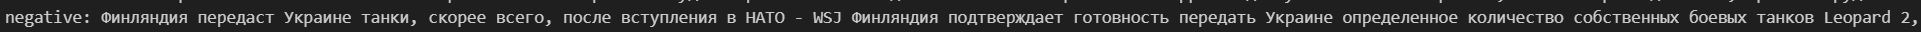

In [274]:
sample = df.sample(30)

In [275]:
for i, row in sample.iterrows():

    print(f"{row['gpt_sentiment']}: {row['text']}")

neutral: Полк Калиновского заявил об освобождении Клещеевки Полк имени Кастуся Калиновского сообщил об освобождении села Клещеевка в Бахмутском районе Донецкой области и показал видео, на котором видно, как бойцы идут по населенному пункту. Источник: полк Калиновского в Telegram Дословно: На видео - кадры, снятые медиками Калиновского полка, которые въезжают в освобожденную от российских оккупантов Клищеевку (пригород Бахмута).
negative: Пожар на Комсомольской площади в Москве произошел в результате в том числе ненадлежащего хранения товаров и нарушения правил пожарной безопасности, заведено дело, сообщил СК ⚪ Наш чат. ➡ Ссылка   Связь. ➡ Ссылка 🤖  Мы в ВК. ➡ Ссылка 
negative: ВСУ вытеснили врага из 4 населенных пунктов на Донбассе – Генштаб Источник: Генштаб Дословно: Авиация Сил обороны, в течение текущих суток, нанесла семнадцать ударов. Подтверждено поражение 13 районов сосредоточения вооружения и военной техники врага и 4 позиций зенитных ракетных комплексов.
negative: Для них [ро

neutral? 

**neutral**: Воины ГПСУ вышли к госгранице Украины в трех областях Украинские пограничники вышли к государственной границе по всем направлениям в Киевской, Сумской и Черниговской областях и восстанавливают обустройство позиций. Источник: спикер ГПСУ Андрей Демченко на брифинге в медиацентре Украина и в комментарии УП Прямая речь: В рамках возобновления контроля над государственной границей в пределах Киевской, Черниговской и Сумской областей, откуда защитники Украины выгнали оккупантов, пограничники вышли на все участки.

---

It is a very subjective example. For many people in Ukraine this new is clearly positive.  

So, we need a guideline to ensure consistency in data annotation 

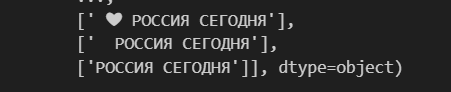

In [310]:
# df.loc[df['channel_name'] == 'UkrPravdaMainNews']   #also in RU
# df.loc[df['channel_name'] == 'radiosvoboda']   #also in RU

**Basic overview**

In [276]:
df['text_len'] = df['text'].apply(len)

In [277]:
df['text_len'].describe()

count    276309.000000
mean        369.441437
std         381.220207
min           3.000000
25%         139.000000
50%         252.000000
75%         455.000000
max        4081.000000
Name: text_len, dtype: float64

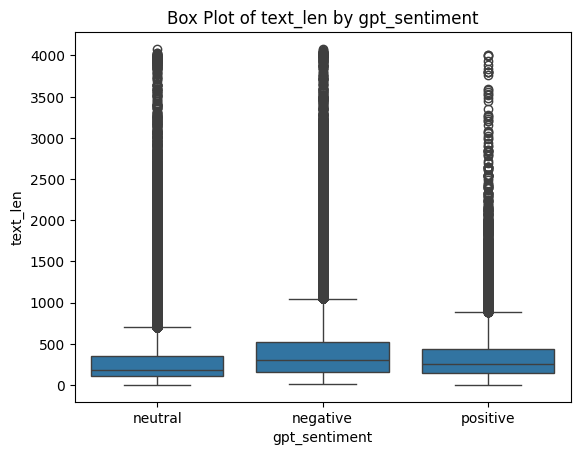

In [279]:
create_boxplot(df, 'text_len', 'gpt_sentiment')

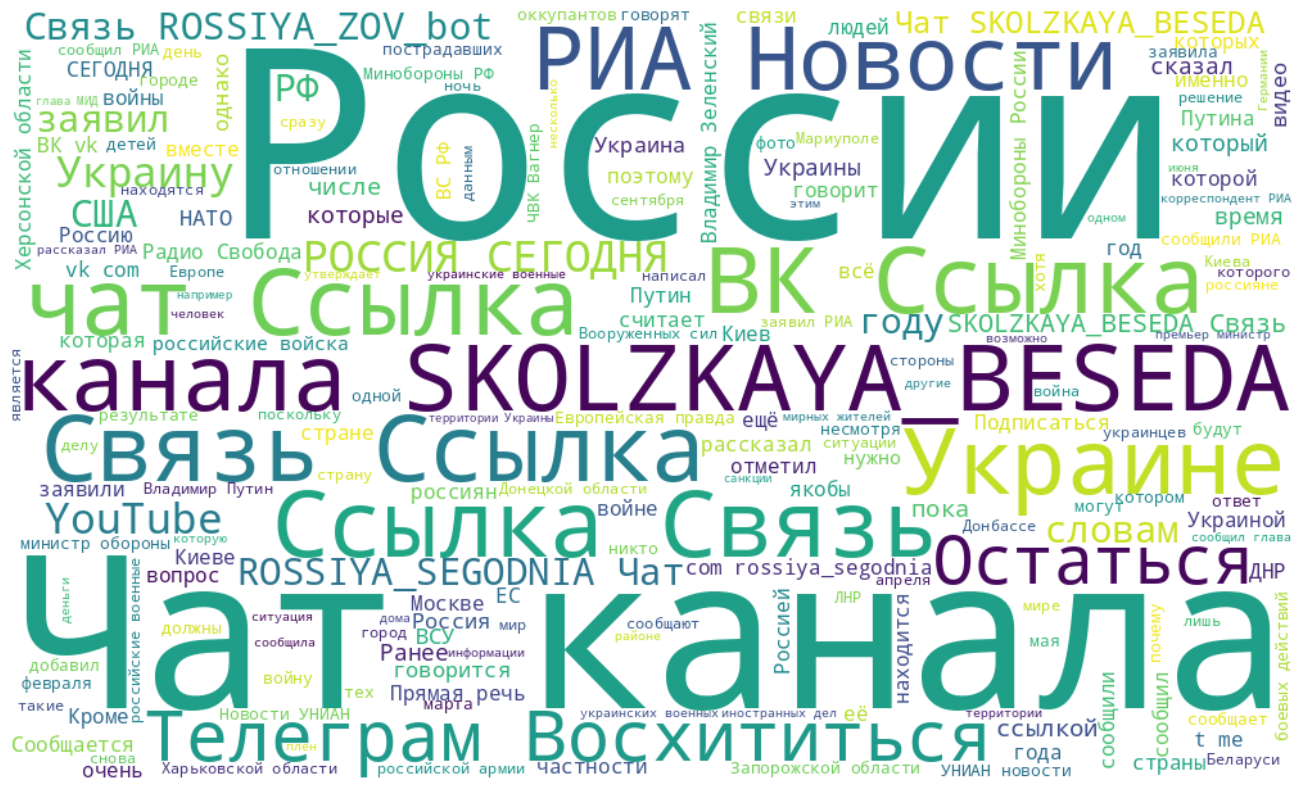

Word cloud saved to ./wordclouds/trwu_wordcloud.png


In [283]:
create_wordcloud(df, 'text', stop_words = set(ua_stopwords['word_list'].values) | set(ru_stopwords['word_list'].values), width = 1000, height=600, output_image_path='./wordclouds/trwu_wordcloud.png')

In [284]:
df['emojis_count'] = df['text'].apply(count_emojis)

In [286]:
df['emojis_count'].describe()

count    276309.000000
mean          0.566992
std           1.547265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          37.000000
Name: emojis_count, dtype: float64

In [289]:
df.loc[(df['emojis_count'] == 37), 'text'][184271]

'ПРАВИТЕЛЬСТВО ЛНР публикует номера «ГОРЯЧИХ ЛИНИЙ» для населения, в т.ч. и с освобождённых территорий. Телефоны горячих линий министерств и ведомств Луганской Народной Республики ☎Пенсионный Фонд ЛНР (0642) 55-14-24; (0642) 58-41-62 ☎Государственный таможенный комитет ЛНР (0642) 55-11-97; (072) 104 82 74 ☎Фонд государственного имущества ЛНР (0642) 50-12-88 ☎Государственная служба финансово-бюджетного надзора ЛНР (0642) 58-11-52 ☎Государственная служба горного надзора и промышленной безопасности ЛНР (0642) 50-01-83; (072) 102 53 90 ☎Государственный комитет тарифного и ценового регулирования ЛНР (0642) 58-02-69 ☎Государственная архивная служба (0642) 58-14-79 ☎Государственный комитет метрологии, стандартизации и технических измерений ЛНР (0642) 58-59-12 ☎Государственный комитет по земельным отношениям ЛНР (0642) 33-19-11; (0642) 33-08-95 ☎Государственная служба ветеринарной медицины ЛНР (0642) 50-28-79 ☎Министерство чрезвычайных ситуаций и ликвидации последствий стихийных бедствий ЛНР (

In [290]:
len(df.loc[(df['emojis_count'] > 0)]) / df.shape[0]

0.18434433912757095

In [293]:
df['special_characters_count'] = df['text'].apply(count_special_characters)

In [294]:
df['special_characters_count'].describe()

count    276309.000000
mean         10.335954
std          11.576926
min           0.000000
25%           3.000000
50%           7.000000
75%          13.000000
max         460.000000
Name: special_characters_count, dtype: float64

In [295]:
len(df.loc[(df['special_characters_count'] > 0)]) / df.shape[0]

0.9614923871462746

In [296]:
df['language'] = df['text'].apply(detect_language_safe) #long execution time

In [297]:
df['language'].value_counts()

language
ru    272966
uk      1691
bg      1248
mk       249
da        81
et        30
en        19
pt         6
ca         5
hr         4
sl         2
sk         2
sv         1
de         1
af         1
he         1
pl         1
fr         1
Name: count, dtype: int64

In [302]:
272966 / 276000

0.9890072463768116

In [299]:
df.loc[(df['language'] == 'uk'), ['text']].values

array([['⚡Владимир Зеленский поговорил по телефону с Джо Байденом Разговор длился около двух часов. Мав довгу телефонну розмову з Джо Байденом. Обговорили поточні дипломатичні зусилля із деескалації та узгодили спільні дії на майбутнє, – написал Зеленский в Twitter. – Обговорили також можливості щодо фінансової підтримки України. Подробнее  https://bit.ly/3IKcVju'],
       ['⚡ Зеленский говорит, что у него «не было недоразумений» во время телефонного разговора с Байденом: У нас немає непорозуміння з президентом Сполучених Штатів. Я просто глибоко розумію, що відбувається в моїй державі, як і він глибоко розуміє, що відбувається у Сполучених Штатах Америки. Ось і все'],
       ['Зеленский готов к любому формату встречи с Путиным, но, по словам украинского президента, к этому не готов Кремль: «Щойно Росія публічно каже, що вона готова говорити щодо деескалації, готова говорити про двосторонні відносини, кожного разу після цього ми робимо запит до Росії, щоб ця зустріч у тому чи іншому фо

In [301]:
df.loc[(df['language'] == 'bg'), ['text']].values #false bg

array([['Трамп считает, что Путин «играет с Байденом», как на барабане'],
       ['Ну не готов - не надо - Путин по теме встречи с Зеленским'],
       ['Стрит-арт с Зеленским в Лос-Анжелесе, на пересечении Melrose и Curson, Los Angeles, CA (7580 Melrose Ave)'],
       ...,
       [' ❤ РОССИЯ СЕГОДНЯ'],
       ['  РОССИЯ СЕГОДНЯ'],
       ['РОССИЯ СЕГОДНЯ']], dtype=object)

**Summary**

This is the largest dataset of all available. It contains Telegram posts about the war from different sources (pro-Ukrainian and pro-ru). Additionally, the dataset includes GPT labeled information about discrimination in posts and geopolitical attitude. 

Also, the authors provide a comparison of distributions of human classified sentiment v.s. GPT labels. We can see the significant differences: GPT is more negative oriented than human annotators. 

However, the authors don't show the examples of sentences where differences occur.  

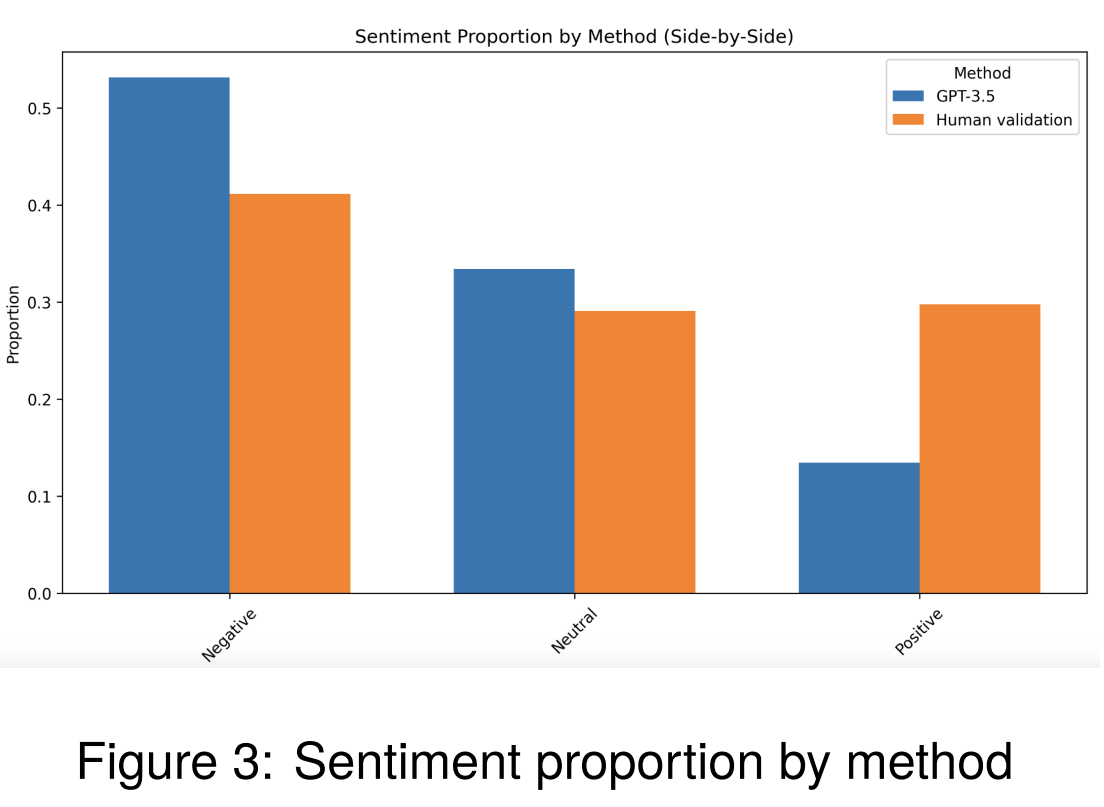

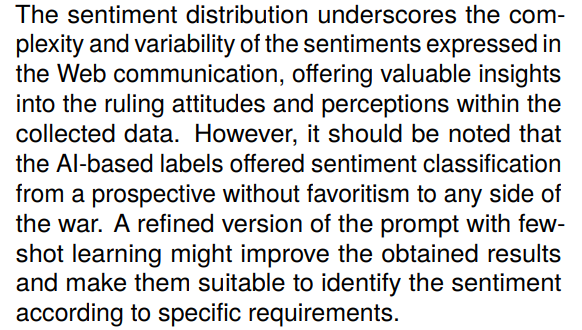

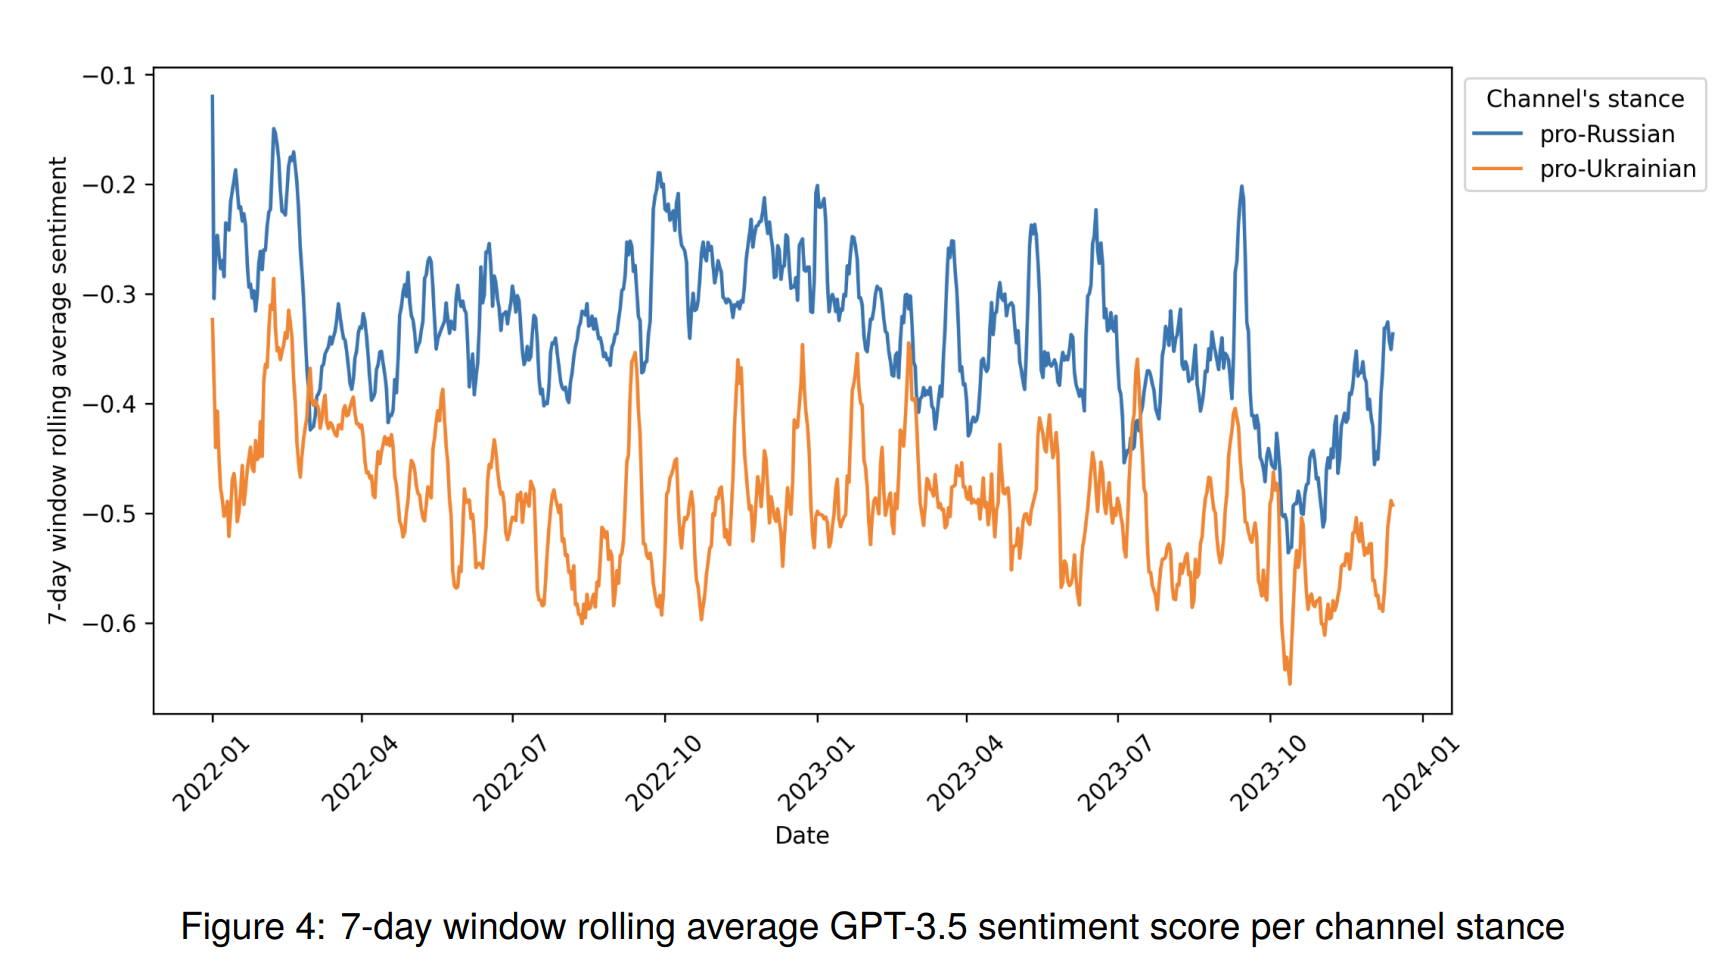

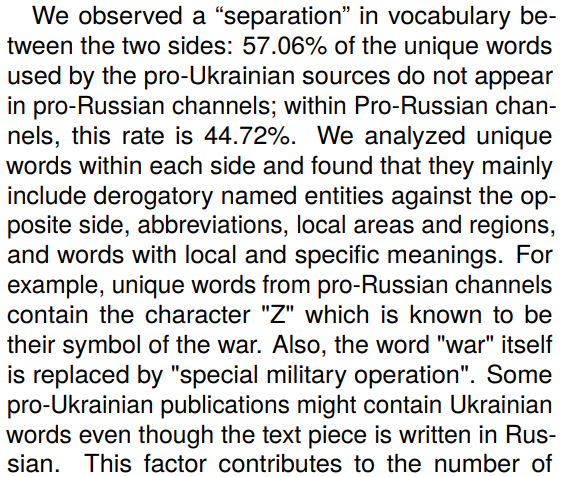

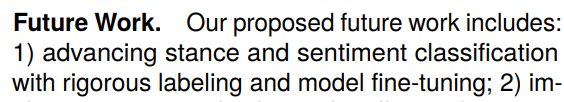